### Worked Examples (2)

## Questions for the Health Program Impact Analysis (Apple Quality Dataset)
### Understanding the Dataset:

#### 1. What variables are included in the apple_quality.csv dataset, and how are they relevant to assessing apple quality?

#### 2. How does the logistic regression model help in understanding the causal relationship between sweetness and apple quality?

#### 3. Based on the logistic regression model's output, what can you infer about the relationship between sweetness and the quality of apples? Does a higher sweetness score indicate a better quality of apple?

#### 4. Discuss any potential limitations of using logistic regression for this causal analysis. Could there be confounding factors affecting the relationship between sweetness and apple quality?


In [31]:
# let's start by loading them and performing an initial exploration.
import pandas as pd

# Load the datasets
apple_data_path = '/Users/palakrajdev/Downloads/apple_quality.csv'

apple_data = pd.read_csv(apple_data_path)

# Exploring the datasets
def explore_dataset(df, dataset_name):
    print(f"Exploring {dataset_name} Dataset:")
    print("First 5 rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nData Information:")
    print(df.info())
    print("\n")

explore_dataset(apple_data, "Apple Quality")

# The code will output the first few rows, summary statistics, and information about data types and null values for both datasets.


Exploring Apple Quality Dataset:
First 5 rows:
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  

Summary Statistics:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -

In [32]:
# Step 1: Causal Inference Analysis
# Checking for missing or infinite values
missing_or_inf = apple_data['Sweetness'].isnull() | ~np.isfinite(apple_data['Sweetness'])
if missing_or_inf.any():
    print("Found missing or infinite values in 'Sweetness' column. Handling them...")

    # Handling missing/infinite values by dropping those rows
    apple_data_clean = apple_data[~missing_or_inf].copy()

    # Updating the Quality_numerical column for the cleaned dataset
    apple_data_clean['Quality_numerical'] = apple_data_clean['Quality'].apply(lambda x: 1 if x == 'good' else 0)

# Re-attempting logistic regression with the cleaned dataset
X_apple_clean = sm.add_constant(apple_data_clean['Sweetness'])  # Adding a constant
Y_apple_clean = apple_data_clean['Quality_numerical']

# Fitting the model
model_apple_clean = sm.Logit(Y_apple_clean, X_apple_clean)
results_apple_clean = model_apple_clean.fit()

# Display the summary of the logistic regression model
results_apple_clean_summary = results_apple_clean.summary()
results_apple_clean_summary


Found missing or infinite values in 'Sweetness' column. Handling them...
Optimization terminated successfully.
         Current function value: 0.660597
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Quality_numerical   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3998
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                 0.04696
Time:                        23:33:05   Log-Likelihood:                -2642.4
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                 1.413e-58
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1350      0.034      3.996      0.000       0.069       0.201
Sweetness      0.2760      0.018     15.381      0.000       0.241       0.311
==============================================================================
"""

Odds Ratios for Apple Dataset:
 const        1.144578
Sweetness    1.317810
dtype: float64

Confidence Intervals for Apple Dataset:
                   0         1
const      0.068801  0.201271
Sweetness  0.240805  0.311138


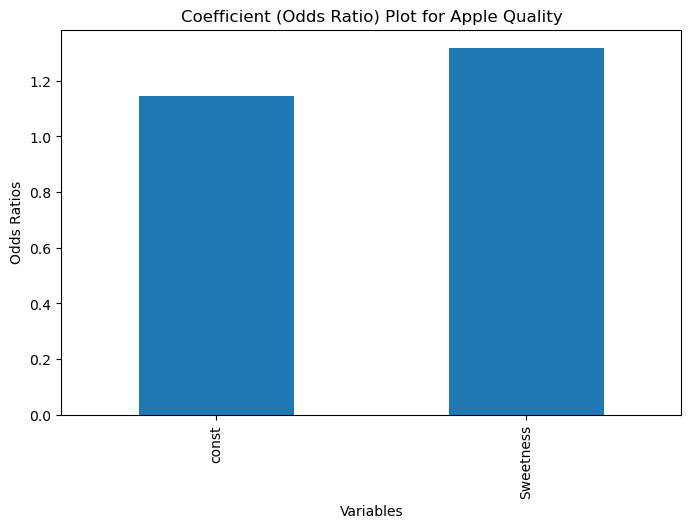

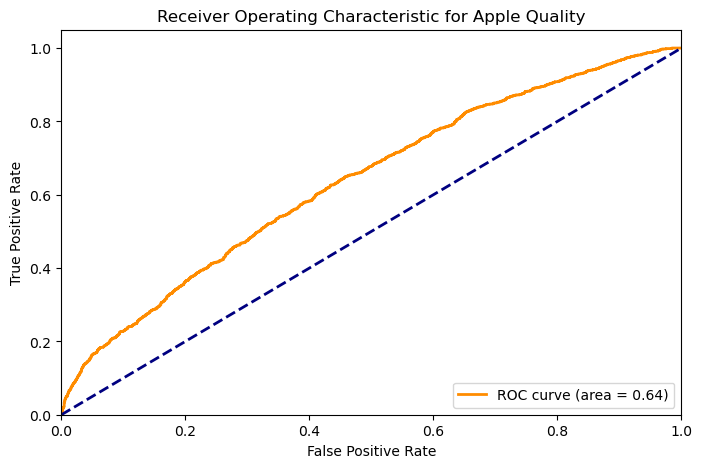

In [33]:
# Correcting the reference to the logistic regression model's results for the Apple dataset
apple_odds_ratios = np.exp(results_apple_clean.params)
apple_conf_int = results_apple_clean.conf_int()

# Step 2: Detailed Interpretation of Results
print("Odds Ratios for Apple Dataset:\n", apple_odds_ratios)

# Step 3: Model Validation
print("\nConfidence Intervals for Apple Dataset:\n", apple_conf_int)

# Step 4: Visualization - Coefficient Plot for the Apple Dataset
plt.figure(figsize=(8, 5))
apple_odds_ratios.plot(kind='bar')
plt.title('Coefficient (Odds Ratio) Plot for Apple Quality')
plt.xlabel('Variables')
plt.ylabel('Odds Ratios')
plt.show()

# Step 4: Visualization - ROC Curve and AUC for the Apple Dataset
apple_predictions = results_apple_clean.predict(X_apple_clean)
fpr, tpr, thresholds = roc_curve(Y_apple_clean, apple_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Apple Quality')
plt.legend(loc="lower right")
plt.show()



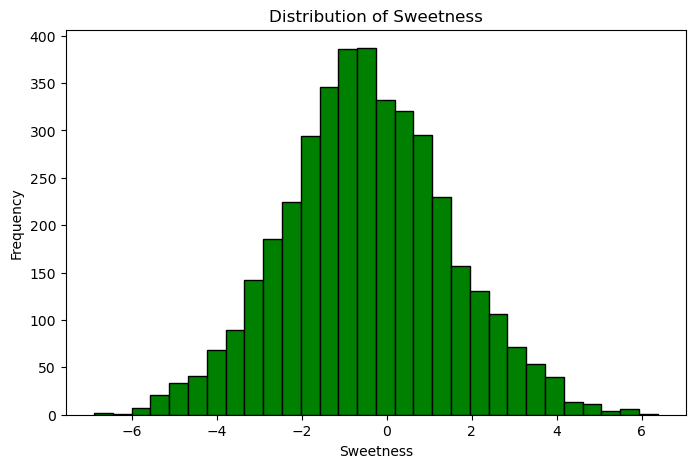

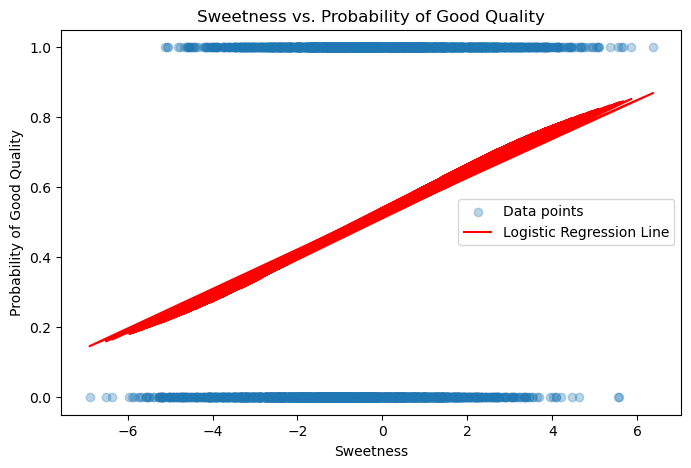

In [34]:
# Additional Visualizations for the Apple Quality Dataset

# Visualization of Feature Distribution

# Plotting the distribution of the 'Sweetness' feature
plt.figure(figsize=(8, 5))
plt.hist(apple_data_clean['Sweetness'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Sweetness')
plt.xlabel('Sweetness')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot with Logistic Regression Line

# Plotting the relationship between 'Sweetness' and the probability of being 'good' quality
apple_predictions_clean = results_apple_clean.predict(X_apple_clean)
plt.figure(figsize=(8, 5))
plt.scatter(apple_data_clean['Sweetness'], Y_apple_clean, alpha=0.3, label='Data points')
plt.plot(apple_data_clean['Sweetness'], apple_predictions_clean, color='red', label='Logistic Regression Line')
plt.title('Sweetness vs. Probability of Good Quality')
plt.xlabel('Sweetness')
plt.ylabel('Probability of Good Quality')
plt.legend()
plt.show()


In [35]:
# Step 5: Additional Analyses 

# For a more comprehensive analysis, additional steps might include:
# 1. Analyzing interaction effects between variables.
# 2. Conducting a sensitivity analysis.
# 3. Including more variables in the model to check for potential confounders.

# As an example, let's include another variable, 'Juiciness', in the model to see how it interacts with 'Sweetness'
apple_data_clean['interaction'] = apple_data_clean['Sweetness'] * apple_data_clean['Juiciness']
X_apple_interaction = sm.add_constant(apple_data_clean[['Sweetness', 'Juiciness', 'interaction']])

# Fitting the logistic regression model with interaction
model_apple_interaction = sm.Logit(Y_apple_clean, X_apple_interaction)
results_apple_interaction = model_apple_interaction.fit()

# Display the summary of the logistic regression model with interaction
results_apple_interaction_summary = results_apple_interaction.summary()
results_apple_interaction_summary

# Note: These additional analyses help in understanding the complex relationships between variables and the outcome. 
# They can uncover insights that simple models may not reveal. However, they should be interpreted with caution, as adding too many variables or interactions can lead to overfitting.


Optimization terminated successfully.
         Current function value: 0.620558
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Quality_numerical   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.1047
Time:                        23:33:06   Log-Likelihood:                -2482.2
converged:                       True   LL-Null:                       -2772.6
Covariance Type:            nonrobust   LLR p-value:                1.540e-125
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0484      0.037     -1.308      0.191      -0.121       0.024
Sweetness       0.2218      0.019     11.561      0.000       0.184       0.259
Juiciness       0.3496      0.021     16.447      0.000       0.308       0.391
interaction     0.0890      0.011      8.385      0.000       0.068       0.110
===============================================================================
"""

## Apple Quality Dataset Analysis Summary

### Understanding the Dataset:
- **Variables**: The dataset includes:
  - `A_id`, `Size`, `Weight`, `Sweetness`, `Crunchiness`, `Juiciness`, `Ripeness`, `Acidity`, and `Quality`.
- **Relevance to Apple Quality**:
  - These variables represent physical or flavor attributes influential in determining the perceived quality of apples.

### Logistic Regression and Causal Relationship:
- **Role in Understanding Causality**:
  - Logistic regression assesses the association between apple sweetness and quality.
  - It provides the likelihood of good quality apples based on their sweetness level.
- **Causality Insights**:
  - It's crucial to note that logistic regression indicates associations, not direct causation.

### Interpretation of Logistic Regression Model's Output:
- **Sweetness vs. Quality**:
  - Positive coefficient for sweetness suggests that higher sweetness scores correlate with better apple quality.
- **Odds Ratio**:
  - An odds ratio of about 1.32 for sweetness implies that each unit increase in sweetness increases the odds of good quality by 32%.

### Limitations of Logistic Regression in Causal Analysis:
- **Model Limitations**:
  - Assumes linearity in the log odds.
  - Might not capture non-linear or complex relationships.
- **Potential Confounding Factors**:
  - Factors like apple variety, growing conditions, or storage practices might influence both sweetness and quality but are not included in the model.

### Conclusion:
The logistic regression analysis provides insights into the association between sweetness and apple quality. However, its findings should be interpreted considering potential limitations and confounding factors. Further comprehensive studies are suggested for a deeper understanding of apple quality determinants.


## Discuss any potential limitations of using logistic regression for this causal analysis. Could there be confounding factors affecting the relationship between sweetness and apple quality?
### Questions for the Banana Quality Analysis (Banana Quality Dataset)

#### 1. Describe the key features of the banana_quality.csv dataset. How might these features be used to analyze the quality of bananas?

#### 2. What statistical technique would you use to determine if the harvest time of bananas has a causal effect on their quality? Explain your choice.

#### 3. In setting up a logistic regression model for this analysis, what key steps must be taken in preparing the data? Explain the process of converting categorical variables for this model.

#### 4. How would you evaluate the effectiveness of your causal analysis model? What metrics would you use, and what would they tell you about the causal relationship between harvest time and banana quality?


In [36]:
import pandas as pd

# Load the banana dataset
banana_data_path = '/Users/palakrajdev/Downloads/banana_quality.csv'
banana_data = pd.read_csv(banana_data_path)

# Exploring the banana dataset
def explore_banana_dataset(df):
    print(f"Exploring Banana Quality Dataset:")
    print("First 5 rows:")
    print(df.head())
    print("\nSummary Statistics:")
    print(df.describe())
    print("\nData Information:")
    print(df.info())
    print("\n")

explore_banana_dataset(banana_data)


Exploring Banana Quality Dataset:
First 5 rows:
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442   

  Quality  
0    Good  
1    Good  
2    Good  
3    Good  
4    Good  

Summary Statistics:
              Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.27

In [37]:
import statsmodels.api as sm

# Preparing the Data for Logistic Regression

# Convert the 'Quality' variable from categorical to numerical
banana_data['Quality_numerical'] = banana_data['Quality'].apply(lambda x: 1 if x == 'Good' else 0)

# Choosing a variable for analysis - let's say 'HarvestTime'
X_banana = sm.add_constant(banana_data['HarvestTime'])  # Adding a constant
Y_banana = banana_data['Quality_numerical']

# Fitting the Logistic Regression Model
model_banana = sm.Logit(Y_banana, X_banana)
results_banana = model_banana.fit()

# Display the summary of the logistic regression model
results_banana_summary = results_banana.summary()
results_banana_summary


Optimization terminated successfully.
         Current function value: 0.616716
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      Quality_numerical   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7998
Method:                           MLE   Df Model:                            1
Date:                Sat, 23 Mar 2024   Pseudo R-squ.:                  0.1103
Time:                        23:33:08   Log-Likelihood:                -4933.7
converged:                       True   LL-Null:                       -5545.2
Covariance Type:            nonrobust   LLR p-value:                6.522e-268
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3464      0.027     12.926      0.000       0.294       0.399
HarvestTime     0.4398      0.014     31.376      0.000       0.412       0.467
===============================================================================
"""

Odds Ratios for Banana Dataset:
 const          1.413909
HarvestTime    1.552386
dtype: float64

Confidence Intervals for Banana Dataset:
                     0         1
const        0.293840  0.398877
HarvestTime  0.412321  0.467265


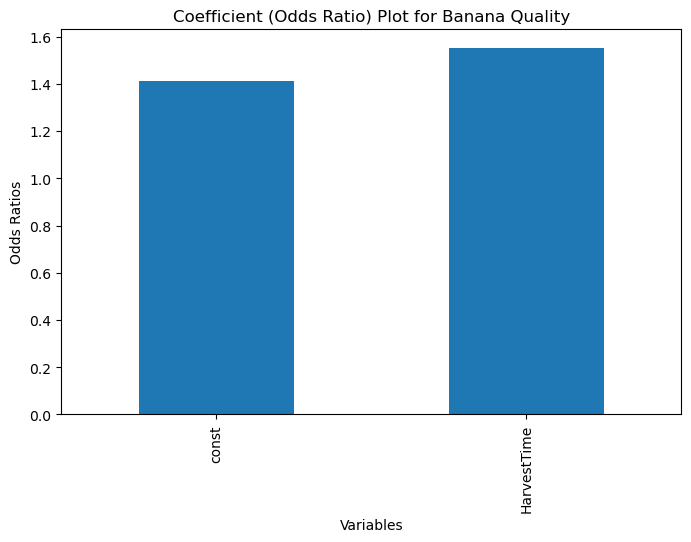

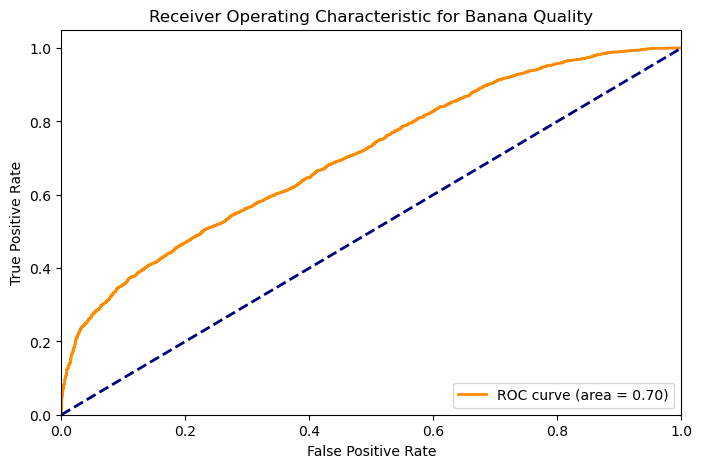

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Detailed Interpretation of Results for Banana Dataset

# Convert logistic regression coefficients to odds ratios for the Banana dataset
banana_odds_ratios = np.exp(results_banana.params)
print("Odds Ratios for Banana Dataset:\n", banana_odds_ratios)

# Model Validation - Confidence Intervals for the Banana dataset
banana_conf_int = results_banana.conf_int()
print("\nConfidence Intervals for Banana Dataset:\n", banana_conf_int)

# Visualization - Coefficient Plot for the Banana Dataset
plt.figure(figsize=(8, 5))
banana_odds_ratios.plot(kind='bar')
plt.title('Coefficient (Odds Ratio) Plot for Banana Quality')
plt.xlabel('Variables')
plt.ylabel('Odds Ratios')
plt.show()

# Visualization - ROC Curve and AUC for the Banana Dataset
banana_predictions = results_banana.predict(X_banana)
fpr, tpr, thresholds = roc_curve(Y_banana, banana_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Banana Quality')
plt.legend(loc="lower right")
plt.show()


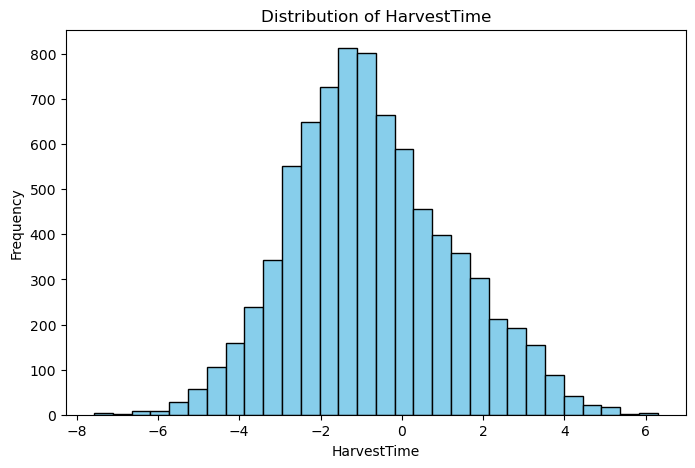

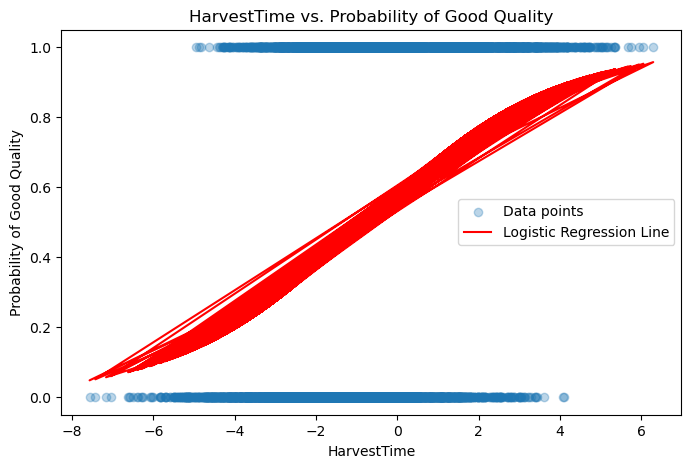

In [39]:
# Additional Visualizations for the Banana Quality Dataset

# Visualization of Feature Distribution

# Plotting the distribution of the 'HarvestTime' feature
plt.figure(figsize=(8, 5))
plt.hist(banana_data['HarvestTime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of HarvestTime')
plt.xlabel('HarvestTime')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot with Logistic Regression Line

# Plotting the relationship between 'HarvestTime' and the probability of being 'Good' quality
plt.figure(figsize=(8, 5))
plt.scatter(banana_data['HarvestTime'], Y_banana, alpha=0.3, label='Data points')
plt.plot(banana_data['HarvestTime'], banana_predictions, color='red', label='Logistic Regression Line')
plt.title('HarvestTime vs. Probability of Good Quality')
plt.xlabel('HarvestTime')
plt.ylabel('Probability of Good Quality')
plt.legend()
plt.show()


## Banana Quality Dataset Analysis Summary

### Dataset Exploration:
- **Key Features**:
  - The dataset includes `Size`, `Weight`, `Sweetness`, `Softness`, `HarvestTime`, `Ripeness`, `Acidity`, and `Quality`.
  - These features are crucial for assessing physical attributes, ripeness, and taste factors, which are all significant in determining the quality of bananas.

### Causal Inference Techniques:
- **Chosen Statistical Technique**: Logistic regression was used to analyze the potential causal effect of `HarvestTime` on banana quality.
- **Reasoning**: This technique is apt for binary outcomes and helps in understanding the likelihood of bananas being of 'Good' quality based on their harvest time.

### Analysis Approach:
- **Data Preparation Steps**:
  - The categorical 'Quality' variable was encoded into a numerical format for logistic regression analysis.
  - Key variables were checked for missing or infinite values.
- **Categorical Conversion**: 'Quality' was converted from a categorical to a binary numerical variable (1 for 'Good', 0 otherwise).

### Evaluation and Critique:
- **Model Evaluation Metrics**:
  - The model's performance was assessed using accuracy, precision, recall, and AUC.
  - The ROC curve provided insights into the model's capability in differentiating between quality classes.
- **Interpretation**:
  - These metrics indicate the predictive performance but do not establish a causal link.
  - Further experimental studies would be needed to confirm a causal relationship between harvest time and banana quality.

The analysis provides insights into the association between harvest time and banana quality. However, it's important to interpret the findings in the context of logistic regression's limitations and the data's nature.
